# Clustering
Identifying similar instances and putting them into clusters is called _clustering_

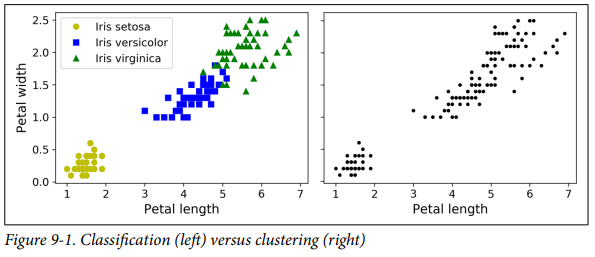

↑ This is how clustering works, its not perfect here, but good enough considering we didnt use other parameters (sepal length and sepal width)

### Application of clustering : 
- _Anomaly detection_ 
- _Image segmentation_
- _Recommender systems_
- _Dimensionality reduction_
- _Search Engine_
- _Data analysis_
- _Semi supervised learning_

___What is a cluster?___   
Cluster do not have any fixed definition, it varies according to problem. A cluster can be instances located around a single fixed point called centeroid Or a cluster can be region of densely packed instances Or there can be a cluster of clusters 

## K-Means clustering
It tries to find the center of blobs and assign each instance to its closest blob

In [74]:
# Creating dataset 
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=42)

# It returns, X=data instances, y=instances lables (0,1,2,3,4)(here lables means which cluster the instance belongs to)

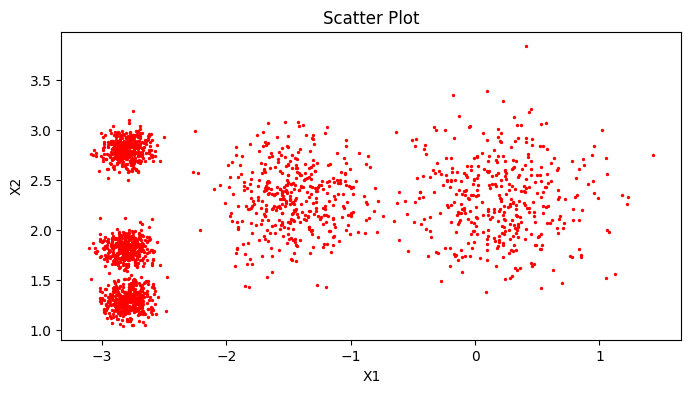

In [75]:
plt.figure(figsize=(8,4))
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X[:,0],X[:,1],c='r',s=2)
plt.title("Scatter Plot")
plt.show()

In [76]:
from sklearn.cluster import KMeans

k = 5 #5 clusters
kmeans = KMeans(n_clusters=k,init="random",n_init=1)

y_pred = kmeans.fit_predict(X,y)

y_pred is _label_ here, Label here is the index of cluster an instance is assigned

In [77]:
y_pred

array([3, 2, 0, ..., 2, 3, 4], shape=(2000,), dtype=int32)

In [78]:
# Check centroid of each cluster
kmeans.cluster_centers_

array([[-1.4453407 ,  2.32051326],
       [-2.79244799,  1.2973862 ],
       [ 0.20925539,  2.30351618],
       [-2.79846237,  2.80004584],
       [-2.80372723,  1.80873739]])

In [79]:
# Predict new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

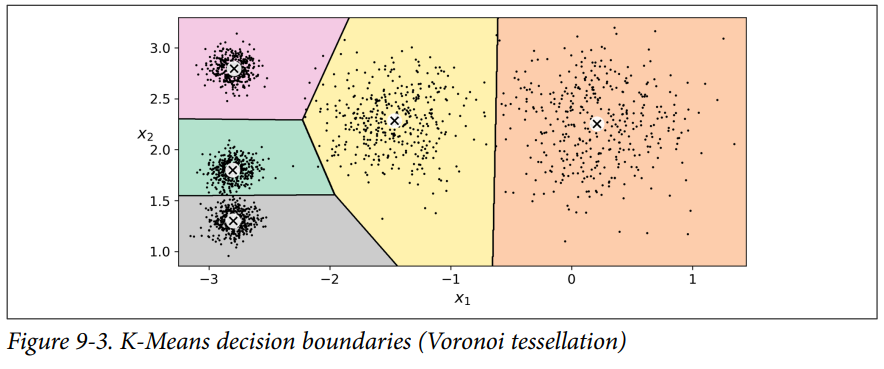

_Note -_  
Instead of assigning each instance a single label directly called _"Hard Clustering"_  
We can assign score to each instance called _"Soft Clustering"_, the score can be distance of instance to each centroid or similarity score (or affinity) given by functions such as gaussian radial basis function

In [80]:
# Assigning distance as score to each instance

kmeans.transform(X_new)
# .transform function measures distance of each instance to all centroids

array([[1.48045212, 2.87948466, 0.36865958, 2.91057812, 2.81024337],
       [4.45688037, 5.8349053 , 2.80720102, 5.85339553, 5.80687792],
       [1.69666372, 1.71521765, 3.28396253, 0.28389977, 1.20732332],
       [1.56498595, 1.22039247, 3.21526454, 0.36144837, 0.7185868 ]])

#### ___kmeans.transform()___ _as dimensionality reduction_  
Suppose original dataset has shape (n,d) and there are "k" clusters in that data then we can reduce the dimension "d" to "k" through this transform,   
Now each features represents distance between instance and centroid instead of original feature value

### How the algorithm works 
- Pick k random points from dataset (k=number of clusters), These are initial centroids
- Assign every instance to these centroids - This will form clusters based on current centroids

- Now compute distance of each instance to its respective centroid in the cluster and take mean of all those distances   
- Now move the centroid to that mean  

Example: suppose we have instance in a cluster as (1,2),(2,3),(3,2)  
Mean along x-axis:  
$\bar{x} = \frac{1 + 2 + 3}{3} = 2$     
Mean along y-axis:   
$\bar{y} = \frac{2 + 3 + 2}{3} = 2.33$   
New centroid coordinates:    
$\mu_1 = (\bar{x}, \bar{y}) = (2, 2.33)$  

- Repeat this until centroid stops moving. This algorithm is guaranteed to converge

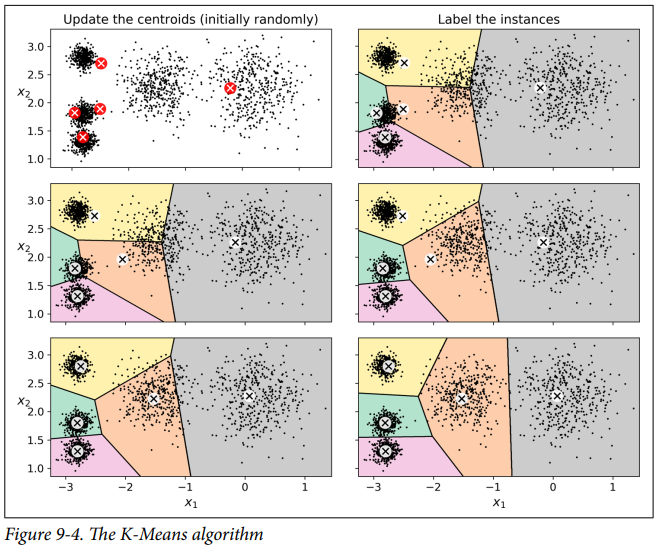

Now the thing is that  
This algorithm will definitely converge, but to optimal solution? may not!!   
Wheather this converges to local optimum or global optimum depends on centroid initialization!   
But wasnt that random? Yes, but there are few things we can do though

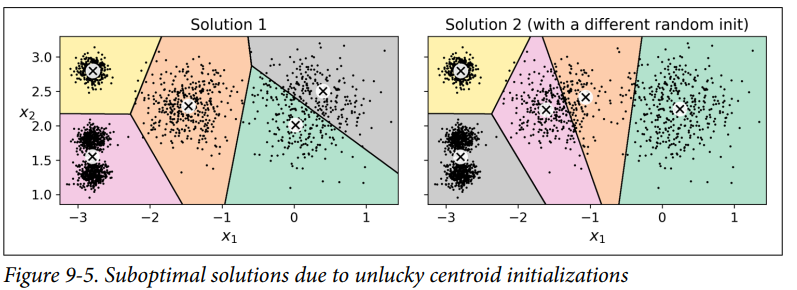

### Centroid Initialization methods

1. If you happen to know where centroids should be, we can give that to model as numpy array and keep n_init=1
``` python
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
```

2. Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that
the whole algorithm described earlier runs 10 times when you call fit(), and ScikitLearn keeps the best solution.  
How to decide which is better solution? _Performance metric_ called ___inertia___

In [81]:
kmeans.inertia_
#Only the best inertia is returned

213.42177131258913

In [82]:
kmeans.score(X)
# Its value is negative so it can follow that "Bigger is better rule" of sklearn

-213.42177131258913

In [83]:
kmeans_10_init = KMeans(n_clusters=k,n_init=10,init="random",random_state=42)
y_pred = kmeans_10_init.fit_predict(X)

In [84]:
kmeans_10_init.inertia_

213.42177131258913

3. K-Means++, this uses some formulae to get a better initialization (im not going into those calculations tho)  
It is the default in sklearn and we will be using this most of the time  

_When n_init='auto', the number of runs depends on the value of init: 10 if using init='random' or init is a callable; 1 if using init='k-means++' or init is an array-like_

In [86]:
kmeans_plus2 = KMeans(n_clusters=k,n_init=5,init="k-means++")
y_pred = kmeans_plus2.fit_predict(X)
kmeans_plus2.inertia_

213.42177131258913

_"algorithm" parameter_   

| Algorithm | Speed                         | Memory  | Notes                                          |
| --------- | ----------------------------- | ------- | ---------------------------------------------- |
| `"lloyd"` | Baseline                      | Low     | Stable and simple                              |
| `"elkan"` | Faster if k large, dimensionality moderate | Higher  | Uses triangle inequality pruning               |
| `"auto"`  | Depends                       | Depends | Safest choice, picks best option automatically |


### Mini Batch k-means
Instead of using whole dataset, it uses a random subset of it for each iteration and improves the model gradually along it

In [131]:
from sklearn.cluster import MiniBatchKMeans

mini_kmeans = MiniBatchKMeans(n_clusters=k,n_init=3,batch_size=100,random_state=42)
y_pred = mini_kmeans.fit_predict(X)

In [132]:
mini_kmeans.inertia_

213.94977039469092

### Mini Batch with memmap
When data do not fit in memory the simplest option is to use `memmap` 

In [113]:
#Not using fetch_openml cuz its not working for som reason
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [135]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train= X_train.reshape(60000,28*28)
X_test=X_test.reshape(10000,28*28)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(60000, 784) (10000, 784) (60000,) (10000,)


In [ ]:
X_memmap = np.memmap(filename="mnist_.mmap",dtype='float32',mode='w+',
                     shape=(X_train.shape[0],X_train.shape[1]))
X_memmap[:,:]=X_train
X_memmap.flush()

In [144]:
## Error was so high when ran without normalizing 
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_memmap=scalar.fit_transform(X_memmap)

In [145]:
batch_kmeans_mnist = MiniBatchKMeans(n_clusters=10,batch_size=500,random_state=42)
#10 clusters cuz there are 10 images
batch_kmeans_mnist.fit(X_memmap)

,n_clusters,10
,init,'k-means++'
,max_iter,100
,batch_size,500
,verbose,0
,compute_labels,True
,random_state,42
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [146]:
batch_kmeans_mnist.inertia_

37149908.0

This inertia is considered okay-ish since we have a very high dimensional data and obviously distances will be large..   
We can only decide inertia is bad or not by running different algorithms and then comparing

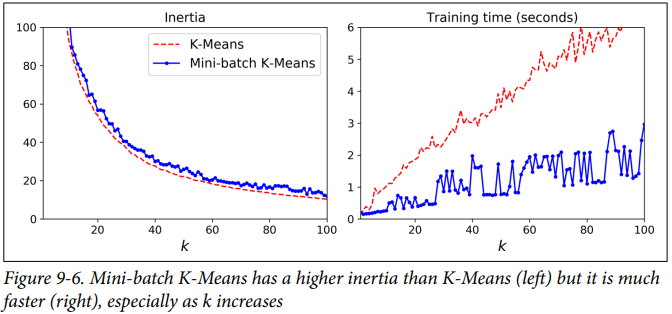

### How to pick _number of clusters `k`_ 

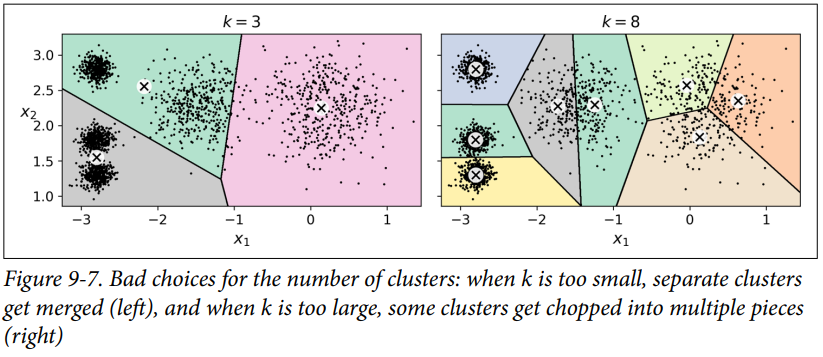

___1. Compare models inertia___

In [163]:
kmean_models = [KMeans(n_clusters=k,n_init=10).fit(X) for k in range(2,10)]
model_inertia = [model.inertia_ for model in kmean_models]

Note that inertia alone does not tell if a model is good or bad. The more the number of clusters, inertia is bound to decrease since it is the sum of squared distances between instances and their cluster centroids. But more clusters is obviously bad since that will create overfitting many tiny clusters with very few points each which reduces interpretability and does not reflect meaningful structure in the data

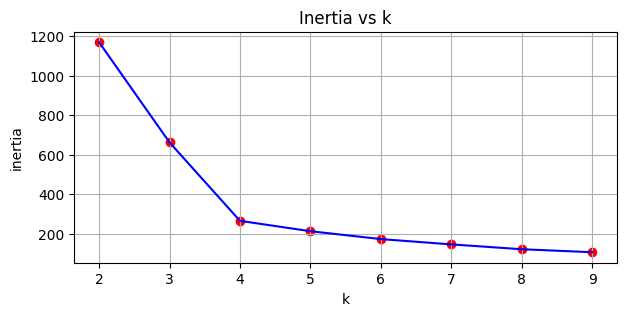

In [168]:
plt.figure(figsize=(7,3))
plt.plot(range(2,10),model_inertia,c='b')
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Inertia vs k")
plt.grid(True)
plt.scatter(range(2,10),y=model_inertia,c='r')

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

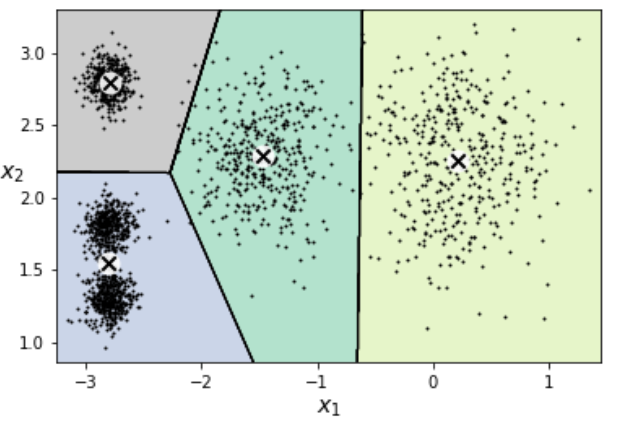

___2. Compare silhouette score___   
What is this?  
Silhouette score is mean of silhouettes coeff for all instances 
$$
\text{Silhouette coeff} = \frac{b(i) - a(i)}{max(b(i),a(i))}
$$

- $b(i)$ is distance between each instance in a cluster to each instance of nearest different cluster
- $a(i)$ is distance between each instance in a clluster to each instance in the same cluster

If silhouette coeff -
- Close to 1 --> $b(i)>>a(i)$, Instances are closely packed and classified to correct cluster
- Close to 0 --> $b(i) \approx a(i)$, More instances are at boderline betweeen clusters 
- negative --> $b(i)<a(i)$, Poor clustering instance in a cluster are closer to other cluster

In [170]:
## implementation using sklearn
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X,kmeans.labels_)
silhouette

0.656578194104489

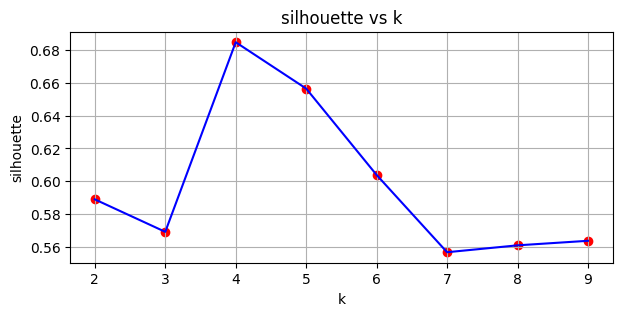

In [172]:
## Comparing different silhouette scores
silhouettes = [silhouette_score(X,model.labels_) for model in kmean_models]
plt.figure(figsize=(7,3))
plt.plot(range(2,10),silhouettes,c='b')
plt.xlabel("k")
plt.ylabel("silhouette")
plt.title("silhouette vs k")
plt.grid(True)
plt.scatter(range(2,10),y=silhouettes,c='r')

This tell the same that $k=4$ is a very good choice but $k=5$ is a good choice too

__Silhouette Diagram__  
Silhouette diagrams visualize cluster quality:
- Each “knife shape” represents a cluster; height = number of instances, width = silhouette coefficients (wider = better).
- The dashed line shows the mean silhouette score.
- Clusters where many instances fall left of the dashed line are poor (instances too close to other clusters).
- Example: k = 3 and k = 6 produce bad clusters; k = 4 and k = 5 give good clusters.
- Between k = 4 and k = 5, even though k = 4 has a slightly higher overall score, k = 5 is preferable because clusters are more evenly sized.

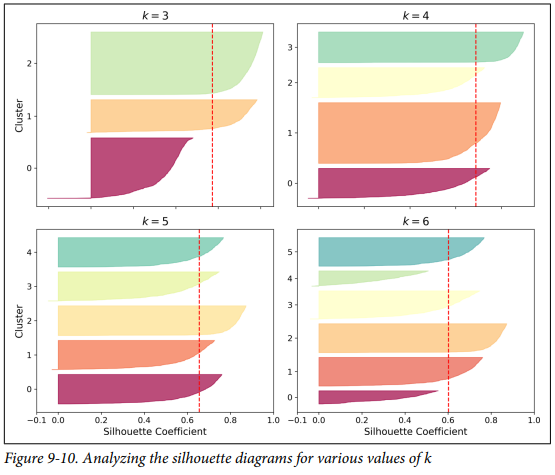

You can ask any LLM to make this for you whenever you need

### Limit of K-Means

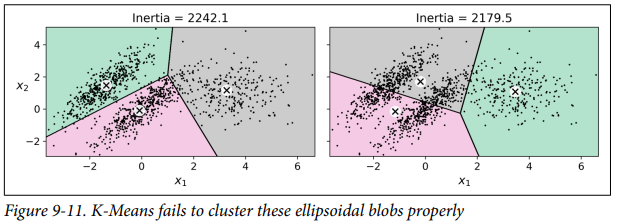

- It is fast and scalable
- But do not work very well on clusters with varying densities, or non-spherical shapes


`Note -`  
It is important to scale the input features before you run K-Means,
or the clusters may be very stretched and K-Means will perform
poorly. Scaling the features does not guarantee that all the clusters
will be nice and spherical, but it generally improves things.